# Read some traces from Tek TDS5000
20200622 weg started<br>
Seems the CSV files might have a bunch of traces.<br>

In [1]:
%matplotlib notebook

import sys, os, glob, logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pandas as pd


In [2]:
fdir = './data/'
fname = '200620_185602.csv'  # -300mV trigger, S/N 6165 ch 4
fname = '200620_184104.csv'  # -100mV trigger, S/N 6165 ch 4

In [3]:
#dir(pd)

In [4]:
adf = pd.read_csv(fdir+fname, header=None, names=['A', 'B', 'C', 'time', 'volt'] )

In [5]:
adf.head()

,A,B,C,time,volt
0,Record Length,5.000000e+02,Points,-3.000000e-08,-1.341105e-08
1,Sample Interval,2.000000e-10,s,-2.980000e-08,-1.341105e-08
2,Trigger Point,1.500000e+02,Samples,-2.960000e-08,1.599999e-02
3,Trigger Time,1.078323e-10,s,-2.940000e-08,7.999987e-03
4,NaN,NaN,NaN,-2.920000e-08,-1.341105e-08


In [6]:
len( adf['time'] )

17000

In [7]:
colors = list(mcolors.TABLEAU_COLORS)
ncolors = len(colors); ncolors

10

<IPython.core.display.Javascript object>


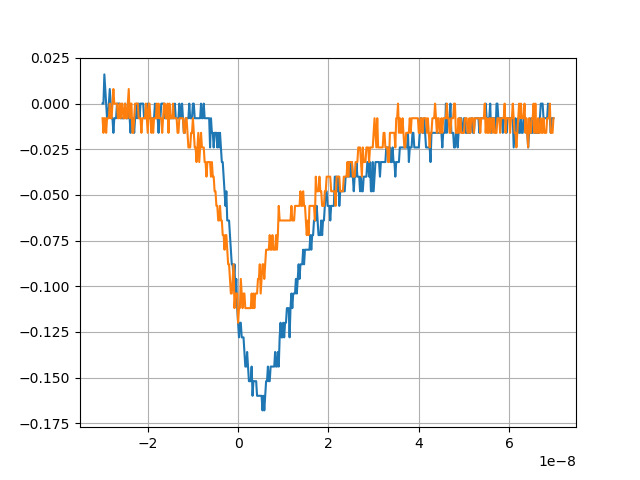

In [8]:
xx = adf['time'].values[0:500]
yy = adf['volt'].values[0:500]
xx2 = adf['time'].values[500:1000]
yy2 = adf['volt'].values[500:1000]


fig, ax = plt.subplots( )

ax.plot( xx, yy, '-', color=colors[0%10], label='first set' )
ax.plot( xx2, yy2, '-', color=colors[1%10], label='second set' )

ax.grid(True)

plt.show()

In [9]:
#[ int( len(adf['time'])/numPoints +0.1 ), list( range(0,76,5) )  ]

<IPython.core.display.Javascript object>


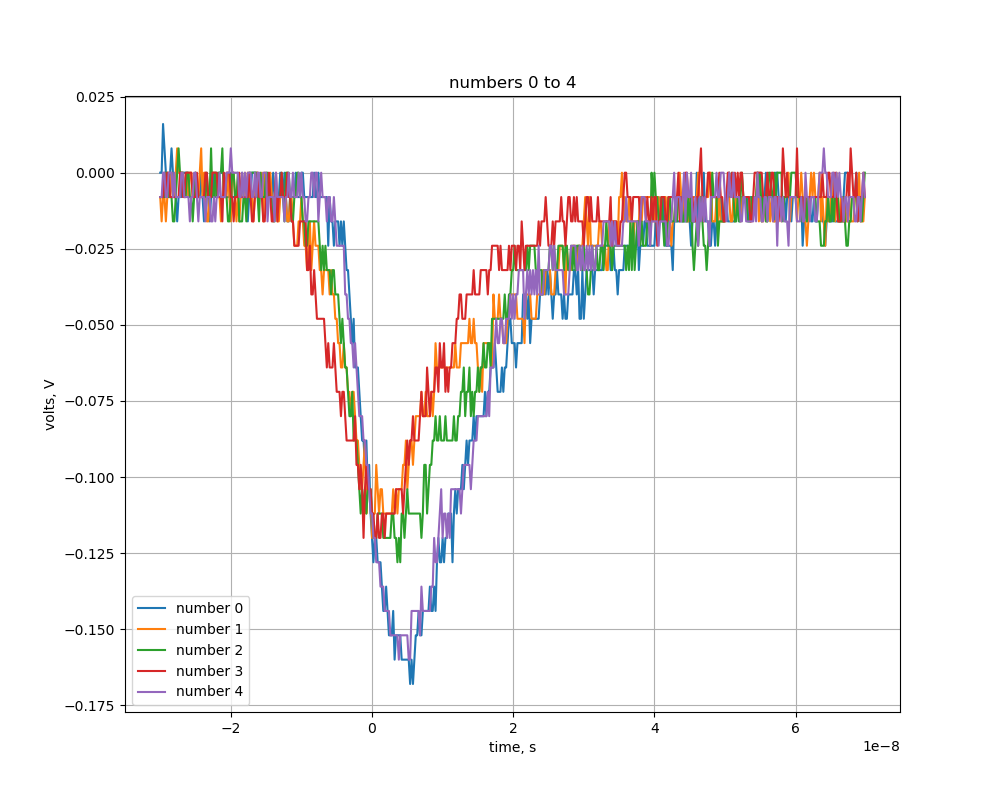

<IPython.core.display.Javascript object>


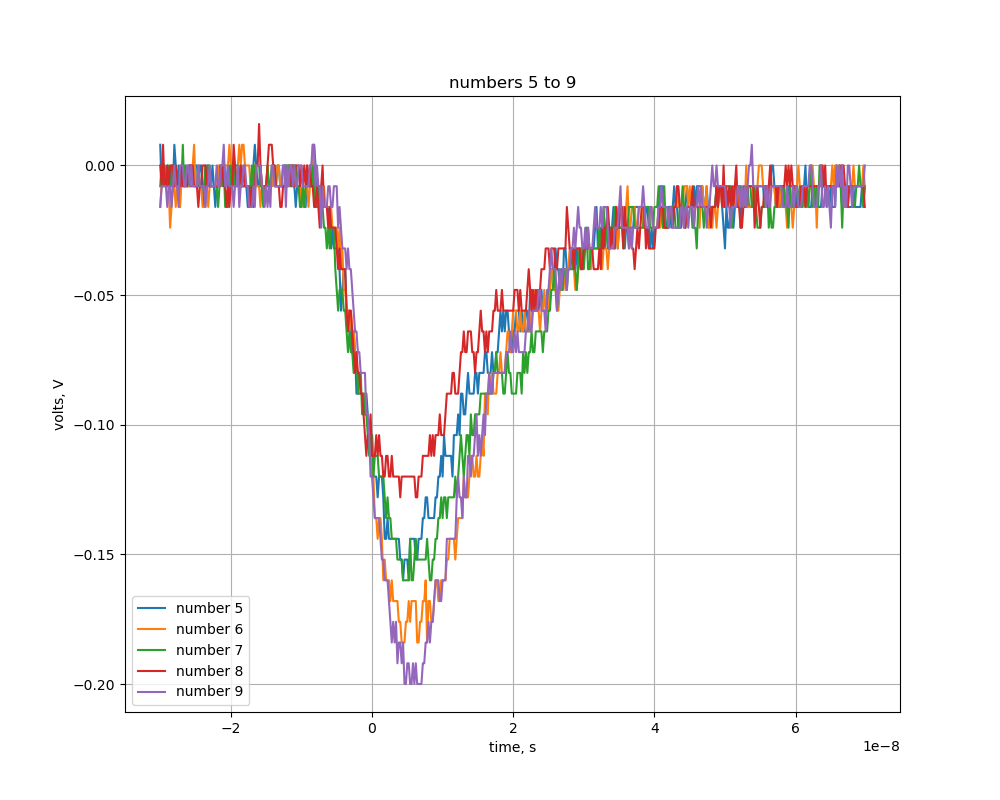

<IPython.core.display.Javascript object>


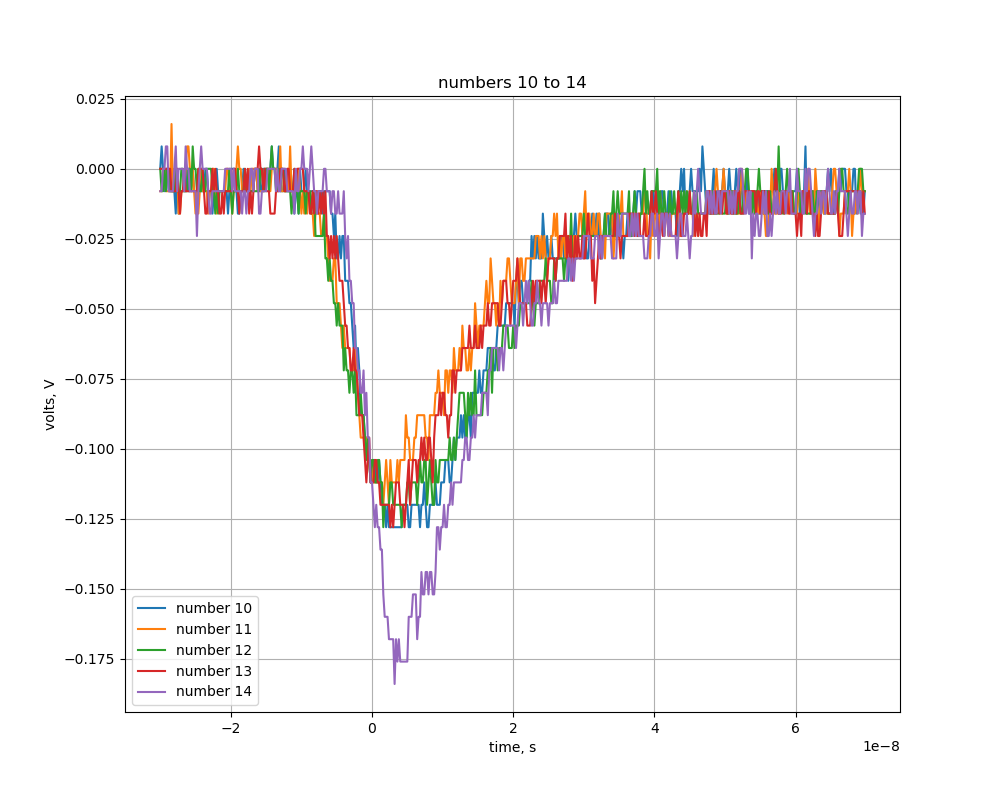

<IPython.core.display.Javascript object>


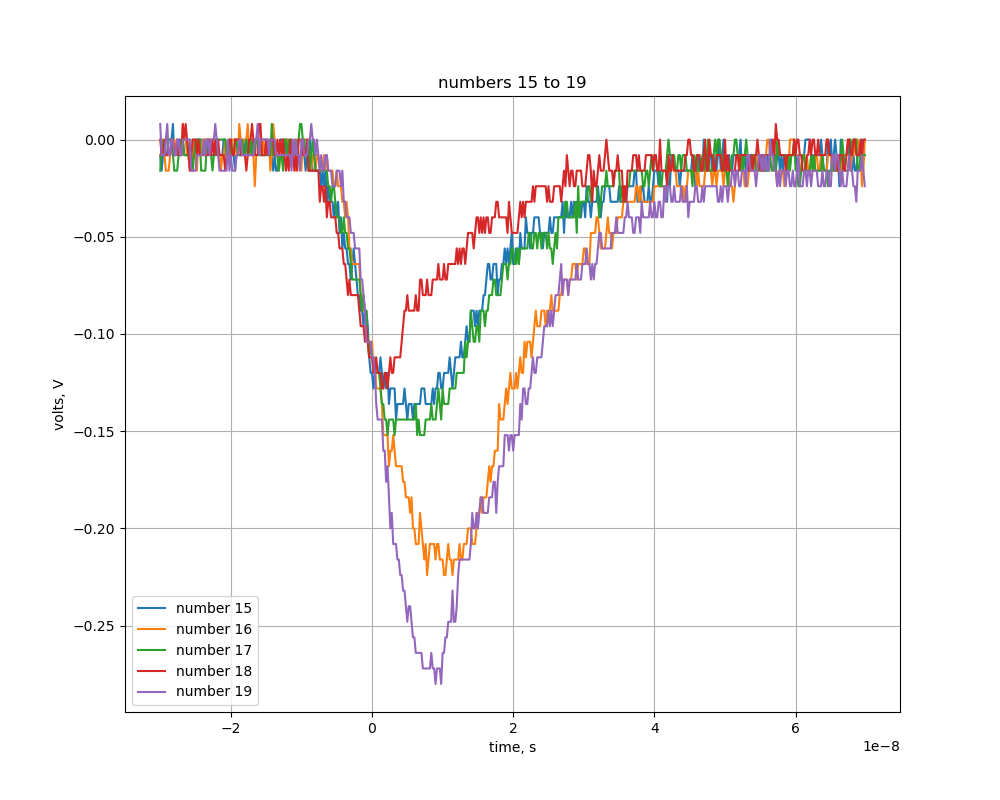

<IPython.core.display.Javascript object>


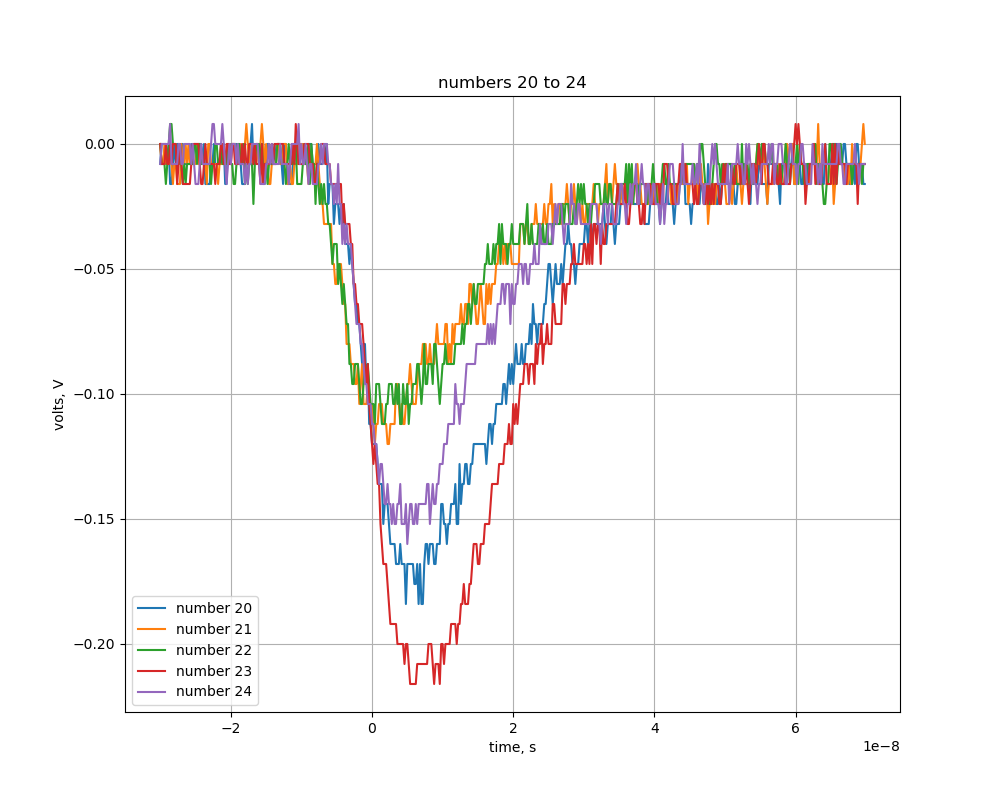

<IPython.core.display.Javascript object>


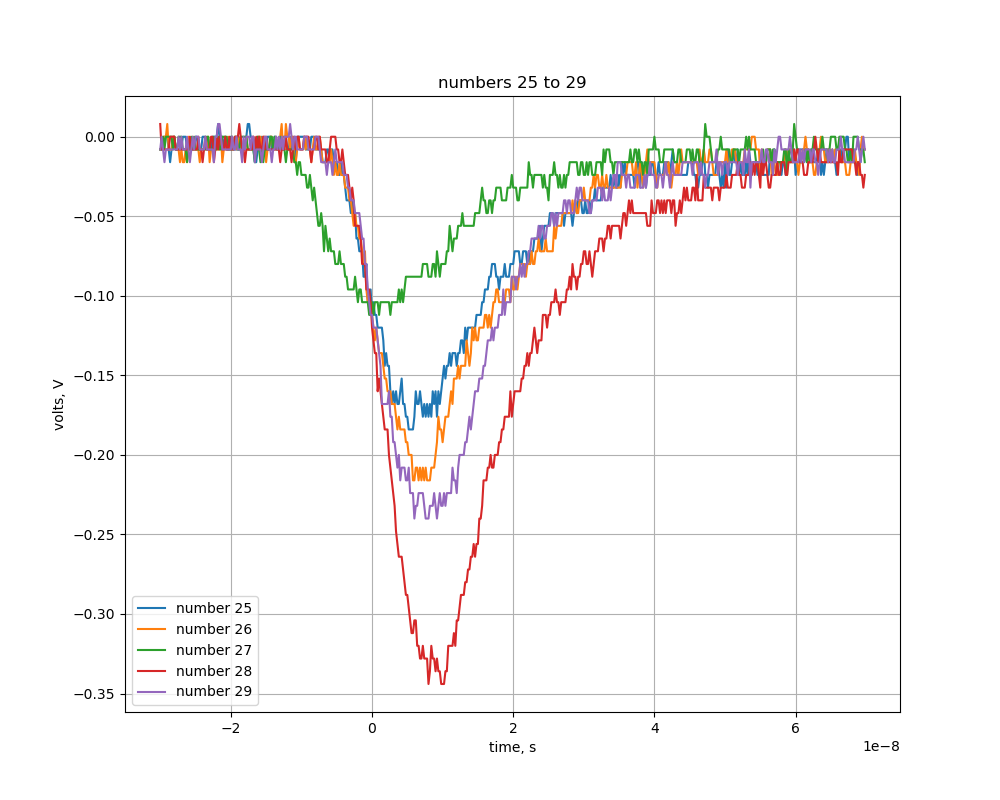

<IPython.core.display.Javascript object>


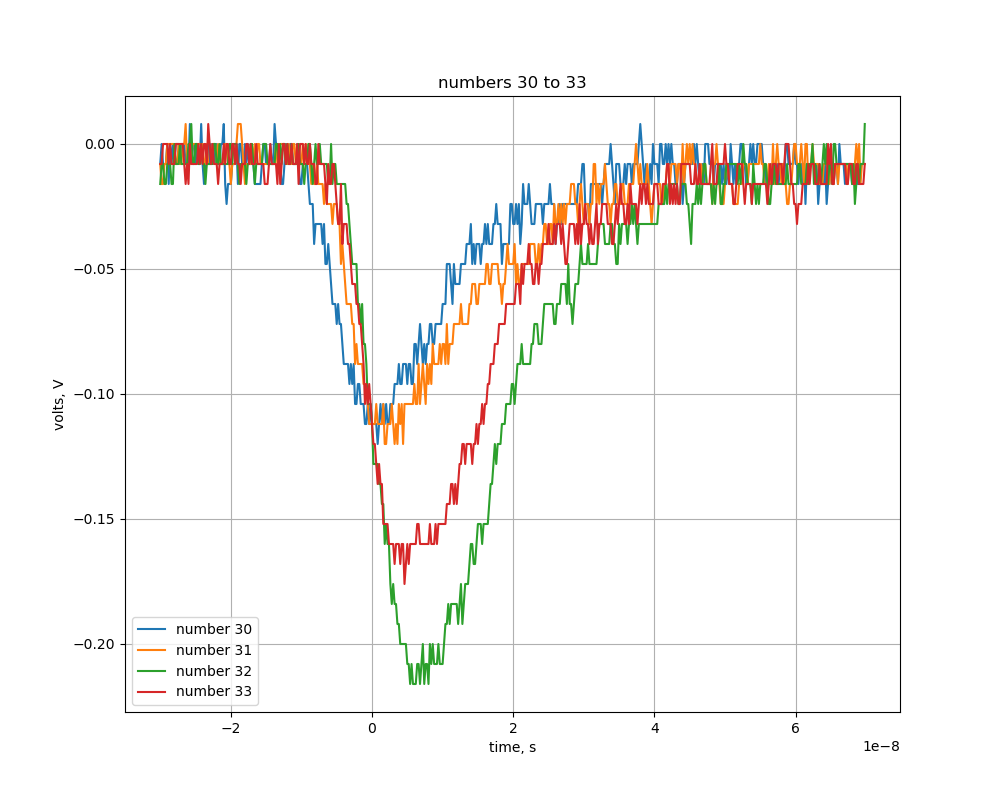

In [10]:
# iterate and put 5 traces into each plot??
numPoints = 500 # number of points in a waveform
numTraces = int( len(adf['time'])/numPoints +0.1 )
numPerPlot = 5

datadir = '/home/gabella/Documents/quarknet/quarknet2020/tek5000/data/savesets/'

for ii in range(0,numTraces,numPerPlot):
    
    fig, ax = plt.subplots( figsize=(10,8) )
    
    jjrange = min(numPerPlot, numTraces-ii)  # Handle the end, with less than numPerPlot figures left.
    for jj in range( jjrange ):
        xx = adf['time'].values[(ii+jj)*numPoints:(ii+jj+1)*numPoints]
        yy = adf['volt'].values[(ii+jj)*numPoints:(ii+jj+1)*numPoints]
        ax.plot( xx, yy, '-', color=colors[jj%10], label=f'number {ii+jj}' )
        ofile = open(datadir + f'number{ii+jj}.dat', 'w')
        for xx, yy in zip(xx, yy):
            astr = f'{xx},\t{yy}\n'
            ofile.write(astr)
        ofile.close()

    ax.set_xlabel('time, s')
    ax.set_ylabel('volts, V')
    ax.set_title(f'numbers {ii} to {ii+jjrange-1}' )
    ax.legend()
    ax.grid(True)

    plt.savefig(datadir + f'waves{ii}to{ii+numPerPlot}.png')    
    if ii==0: 
        plt.show()
    
#plt.show()

In [12]:
# Create numpy array of every 500 time, volt entries, that is one trace on the 'scope .
dlength = 500 # number of points in a trace
tt = adf['time'].to_numpy()
vv = adf['volt'].to_numpy()
[ tt.shape, vv.shape ]

[(38000,), (38000,)]

In [16]:
att = tt.reshape((500, int(len(tt)/500+0.1) ) )
avv = vv.reshape((500, int(len(vv)/500+0.1) ) )

In [22]:
data = np.transpose( np.array( [att,avv] ) )

In [23]:
data.shape

(76, 500, 2)

<IPython.core.display.Javascript object>


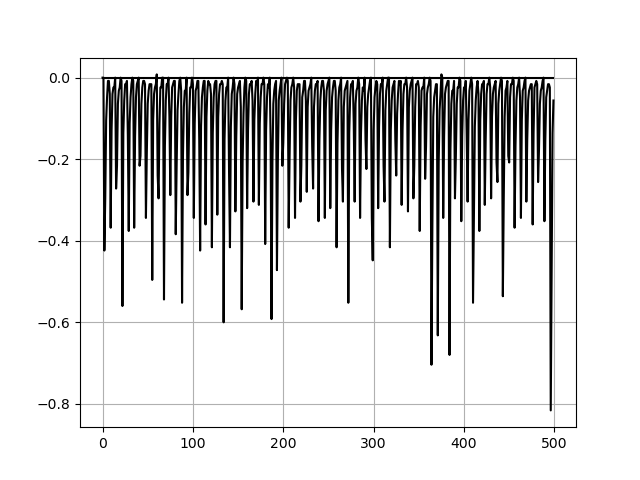

In [26]:
fig, ax = plt.subplots( )

ax.plot( data[3], 'k-', label='0' )

ax.grid(True)

plt.show()